# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
# data = pd.read_csv('cost_revenue_dirty.csv')
# Updated 2023 csv 
data = pd.read_csv('./MovieData2023.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(data.shape)
print(data.head())
print(data.isna().values.any())
print(data.duplicated().values.any())
data.info()


(6411, 6)
  Rank  Release_Date                                  Movie_Title  \
0    1   Dec 9, 2022                     Avatar: The Way of Water   
1    2  Apr 23, 2019                            Avengers: Endgame   
2    3  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    4  Apr 22, 2015                      Avengers: Age of Ultron   
4    5  May 17, 2023                                       Fast X   

  USD_Production_Budget USD_Domestic_Gross USD_Worldwide_Gross  
0          $460,000,000       $684,075,767      $2,319,972,415  
1          $400,000,000       $858,373,000      $2,794,731,755  
2          $379,000,000       $241,071,802      $1,045,713,802  
3          $365,000,000       $459,005,868      $1,395,316,979  
4          $340,000,000       $145,960,660        $718,924,118  
False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6411 entries, 0 to 6410
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------     

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [5]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [6]:
data.Release_Date = data.Release_Date.astype(str).str.replace("Unknown", "")
data.Release_Date = pd.to_datetime(data.Release_Date, format='mixed')
print(data.dtypes)
data.sample(10)


Rank                             object
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Domestic_Gross                int64
USD_Worldwide_Gross               int64
dtype: object


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
5089,"5,091",2006-11-21,The History Boys,3700000,2730296,13447998
4515,"4,517",1991-07-12,Boyz n the Hood,6500000,56190094,56215095
2024,"2,026",1979-08-15,Apocalypse Now,31500000,83535860,85959710
4384,"4,386",2003-07-24,Masked and Anonymous,7500000,533344,555335
3753,"3,755",2000-05-12,Screwed,12000000,6982680,6982680
5945,"5,947",NaT,Crying With Laughter,820000,0,16909
2303,"2,305",1999-10-01,"Mystery, Alaska",28000000,8891623,8891623
6049,"6,051",2018-08-10,Madeline’s Madeline,500000,185576,197340
5835,"5,837",1998-10-23,Orgazmo,1000000,582024,627287
6088,"6,090",2016-04-19,The Sound and the Shadow,500000,0,0


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [12]:
data.describe()
data[data.USD_Production_Budget == 1100]
data[data.USD_Production_Budget == 460000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
0,1,2022-12-09,Avatar: The Way of Water,460000000,684075767,2319972415


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [13]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 706


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
93,94,2020-09-04,Mulan,200000000,0,69973540
95,96,2022-07-13,The Gray Man,200000000,0,451178
94,95,2021-07-02,The Tomorrow War,200000000,0,19220000
152,153,2022-03-10,Turning Red,175000000,0,10872141
191,192,2019-11-01,The Irishman,159000000,0,914706
...,...,...,...,...,...,...
6392,"6,394",NaT,Tin Can Man,12000,0,0
6399,"6,401",2015-05-19,Family Motocross,10000,0,0
6405,"6,407",2022-03-01,Red 11,7000,0,0
6408,"6,410",2015-09-29,A Plague So Pleasant,1400,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [14]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 413


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
192,193,2023-07-26,Haunted Mansion,157750000,0,0
249,250,2019-12-13,6 Underground,150000000,0,0
342,344,2023-12-13,Wonka,125000000,0,0
363,365,2018-11-09,Outlaw King,120000000,0,0
364,366,2022-12-02,Emancipation,120000000,0,0
...,...,...,...,...,...,...
6392,"6,394",NaT,Tin Can Man,12000,0,0
6399,"6,401",2015-05-19,Family Motocross,10000,0,0
6405,"6,407",2022-03-01,Red 11,7000,0,0
6408,"6,410",2015-09-29,A Plague So Pleasant,1400,0,0


### Filtering on Multiple Conditions

In [17]:
# international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
#                                   (data.USD_Worldwide_Gross != 0)]
# international_releases
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 293


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
93,94,2020-09-04,Mulan,200000000,0,69973540
94,95,2021-07-02,The Tomorrow War,200000000,0,19220000
95,96,2022-07-13,The Gray Man,200000000,0,451178
152,153,2022-03-10,Turning Red,175000000,0,10872141
191,192,2019-11-01,The Irishman,159000000,0,914706


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [19]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0').head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
93,94,2020-09-04,Mulan,200000000,0,69973540
94,95,2021-07-02,The Tomorrow War,200000000,0,19220000
95,96,2022-07-13,The Gray Man,200000000,0,451178
152,153,2022-03-10,Turning Red,175000000,0,10872141
191,192,2019-11-01,The Irishman,159000000,0,914706


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [41]:
# Date of Data Collection
scrape_date = pd.Timestamp('2023-7-20')

In [43]:
unreleased_films = data.query('Release_Date >= @scrape_date')
unreleased_films
data_clean = data.drop(unreleased_films.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [48]:
lost_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(f"Number of films that lost money: {len(lost_money)}")
lost_money.head(10)
lost_money.shape[0]/data_clean.shape[0]

Number of films that lost money: 2405


0.37542928504527007

# Seaborn for Data Viz: Bubble Charts

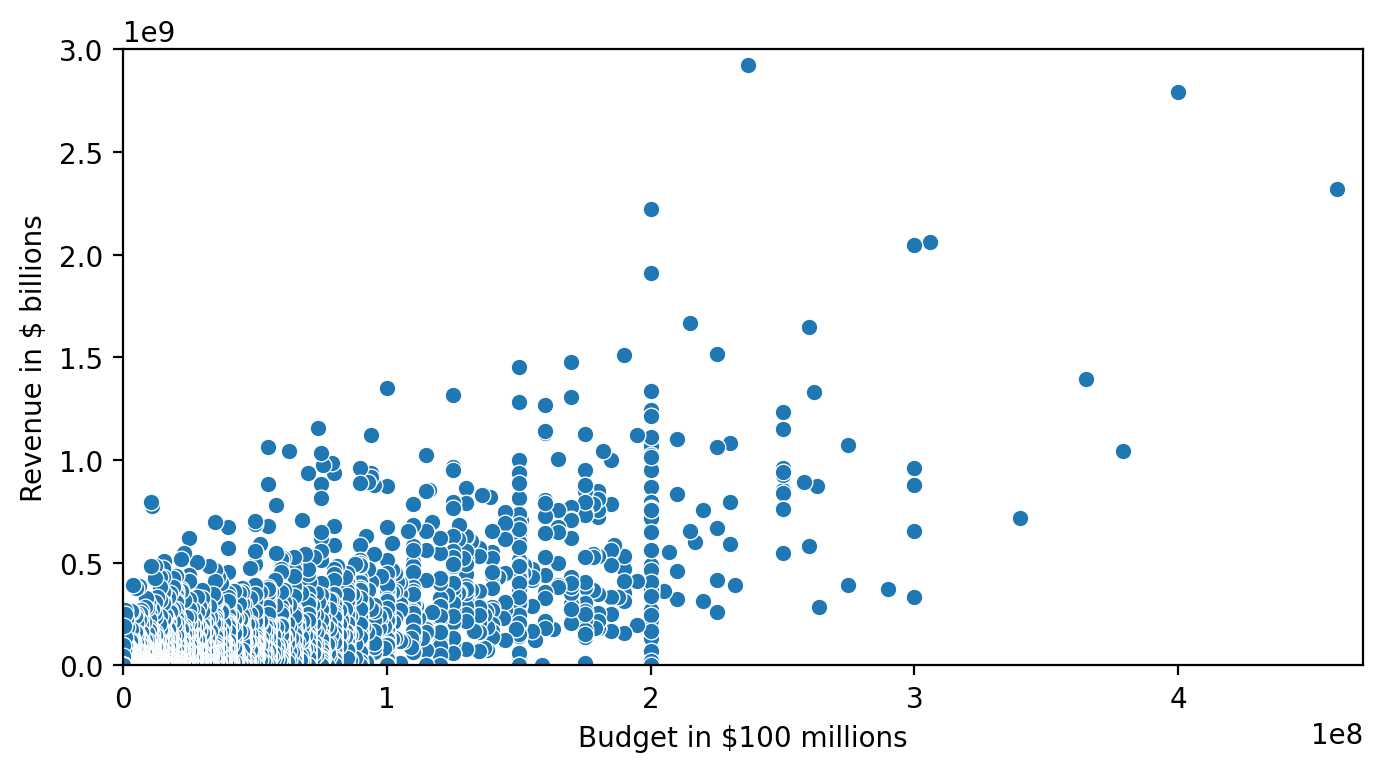

In [53]:
plt.figure(figsize=(8,4), dpi=200)
# sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 470000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

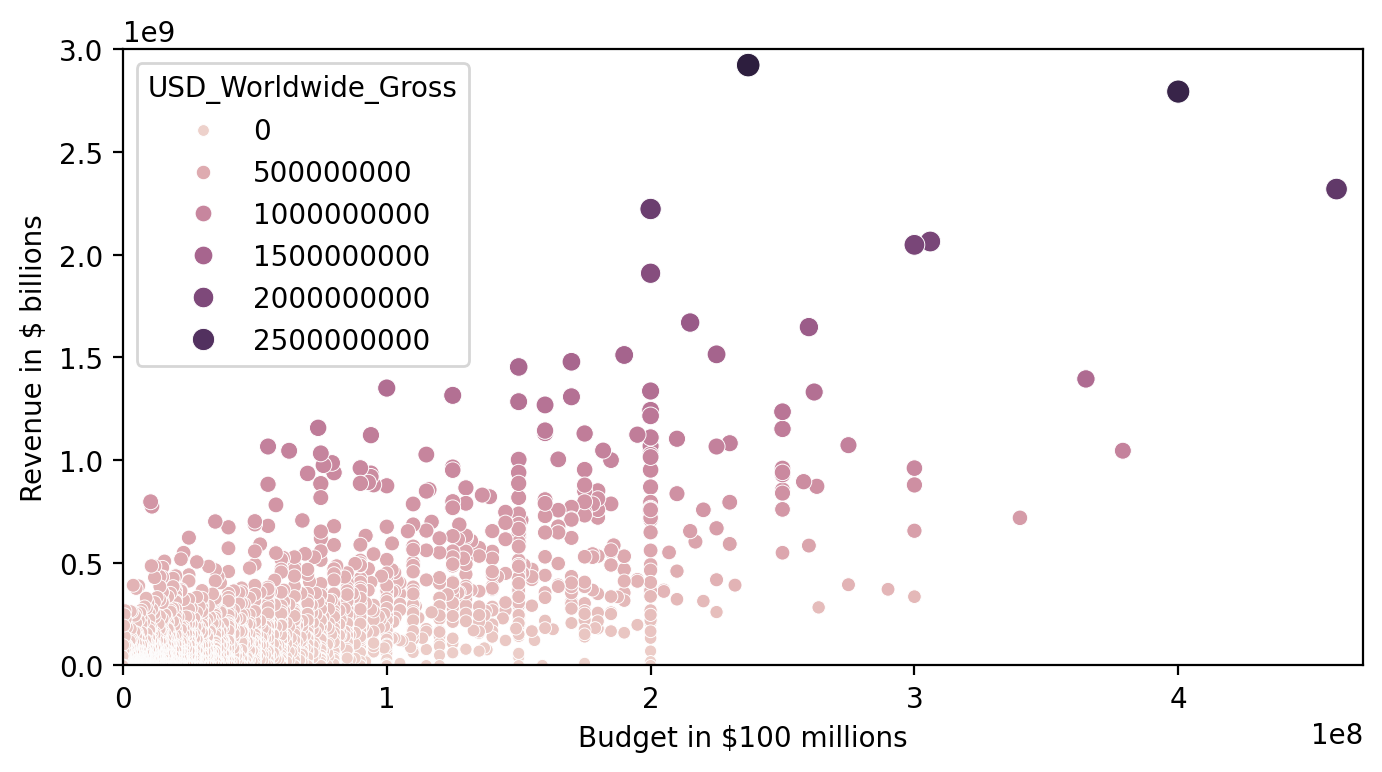

In [54]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 470000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

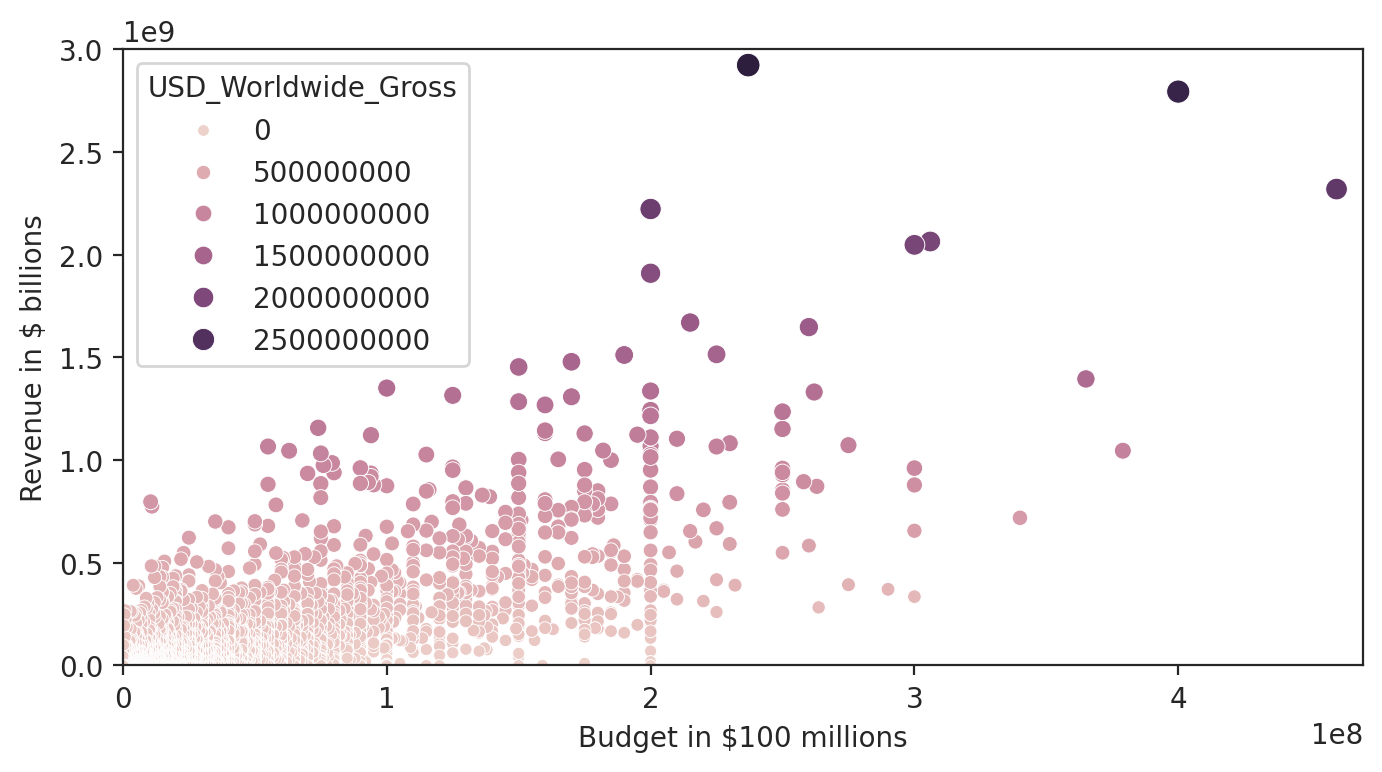

In [59]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('ticks'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 470000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



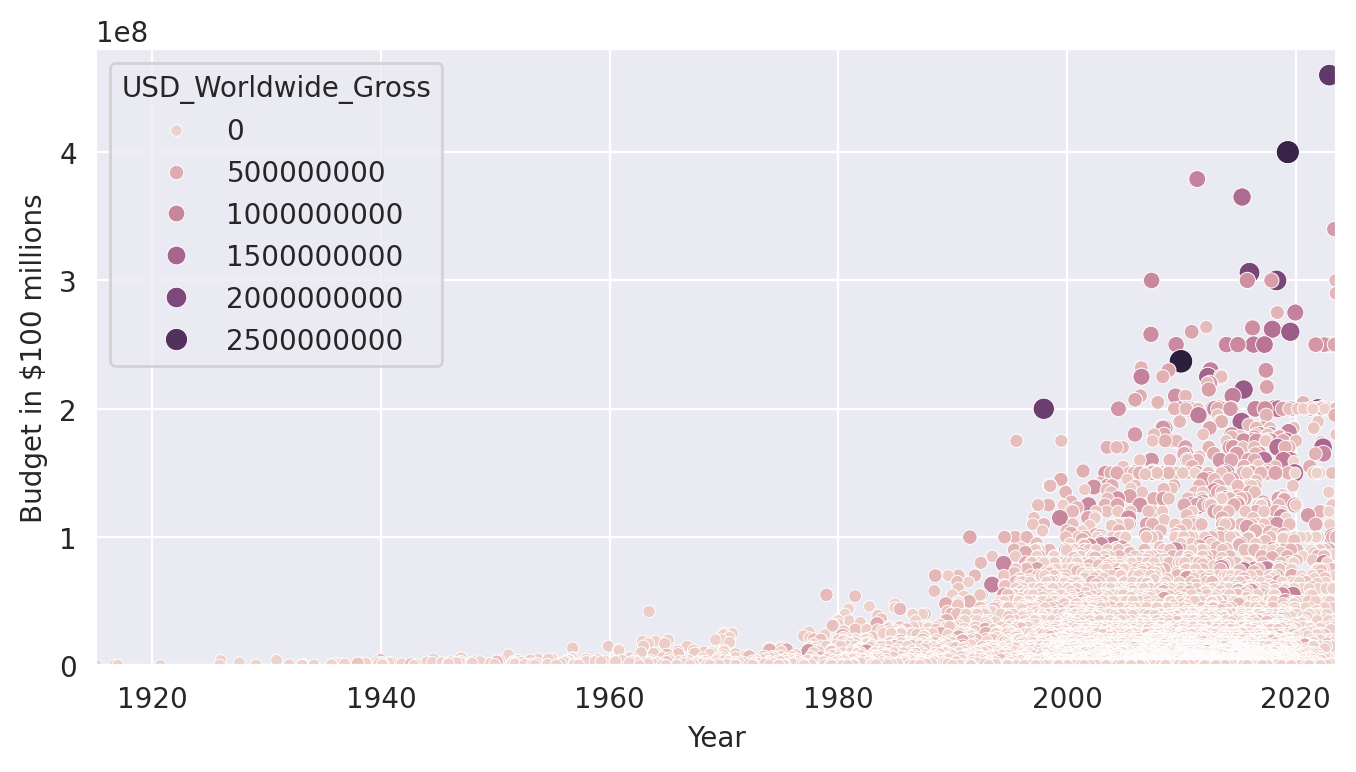

In [61]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 480000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [71]:
data_years = pd.DatetimeIndex(data=data_clean.Release_Date)
years = data_years.year
years

Index([2022.0, 2019.0, 2011.0, 2015.0, 2023.0, 2015.0, 2018.0, 2007.0, 2017.0,
       2015.0,
       ...
       1993.0, 2004.0, 2006.0,    nan, 2022.0, 1999.0, 2005.0, 2015.0, 2005.0,
       2021.0],
      dtype='float64', name='Release_Date', length=6406)

In [70]:
decades = years//10*10
data_clean['Decade'] = decades


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross,Decade
0,1,2022-12-09,Avatar: The Way of Water,460000000,684075767,2319972415,"2,020.00"
1,2,2019-04-23,Avengers: Endgame,400000000,858373000,2794731755,"2,010.00"
2,3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,"2,010.00"
3,4,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,"2,010.00"
4,5,2023-05-17,Fast X,340000000,145960660,718924118,"2,020.00"


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [78]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]
print(len(old_films))
old_films.sort_values('USD_Production_Budget', ascending=False).head()

167


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross,Decade
1516,"1,518",1963-06-12,Cleopatra,42000000,57000000,71000000,"1,960.00"
2592,"2,594",1969-12-16,"Hello, Dolly",24000000,33208099,33208099,"1,960.00"
2832,"2,834",1969-10-15,Paint Your Wagon,20000000,31678778,31678778,"1,960.00"
2888,"2,890",1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,"1,960.00"
2931,"2,933",1969-04-01,Sweet Charity,20000000,8000000,8000000,"1,960.00"


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

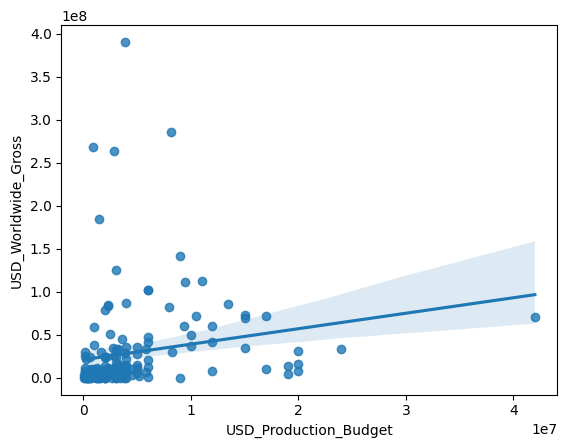

In [79]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

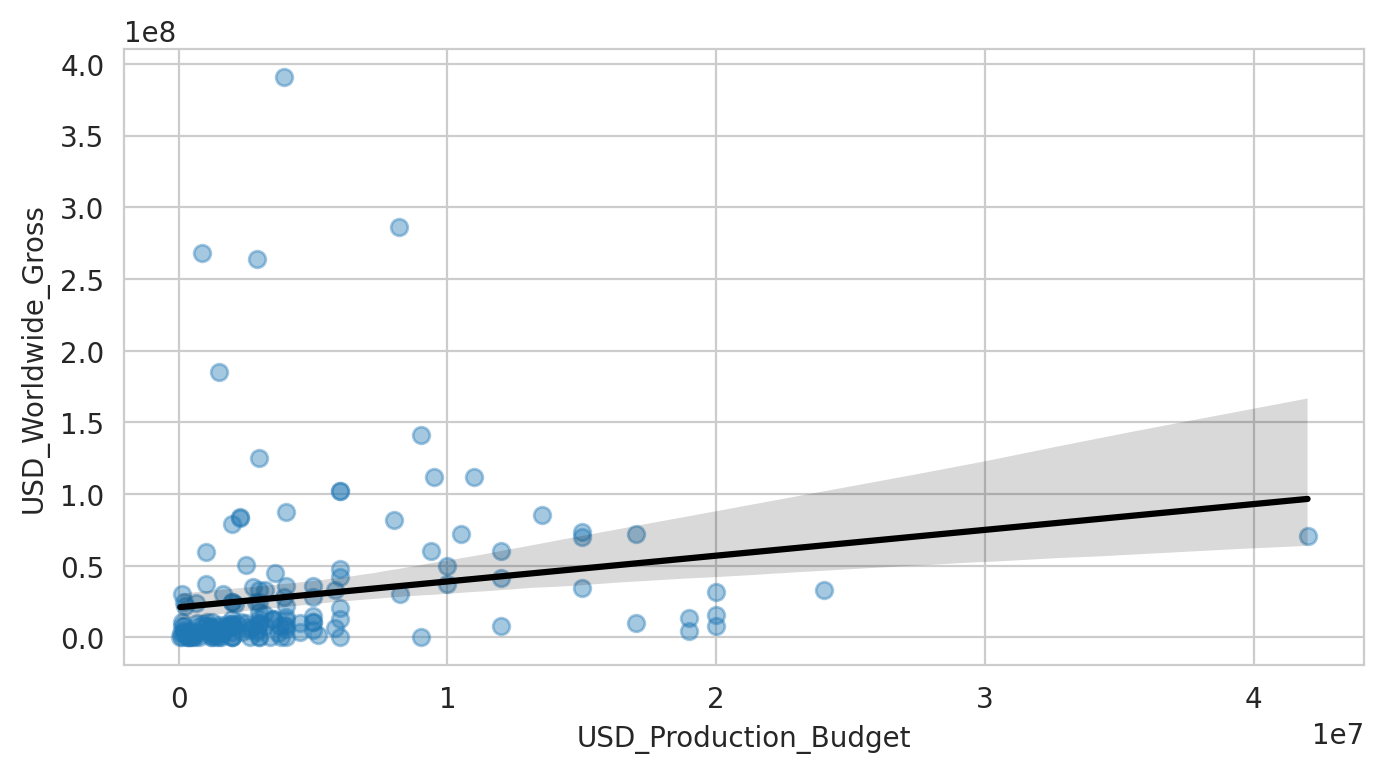

In [80]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

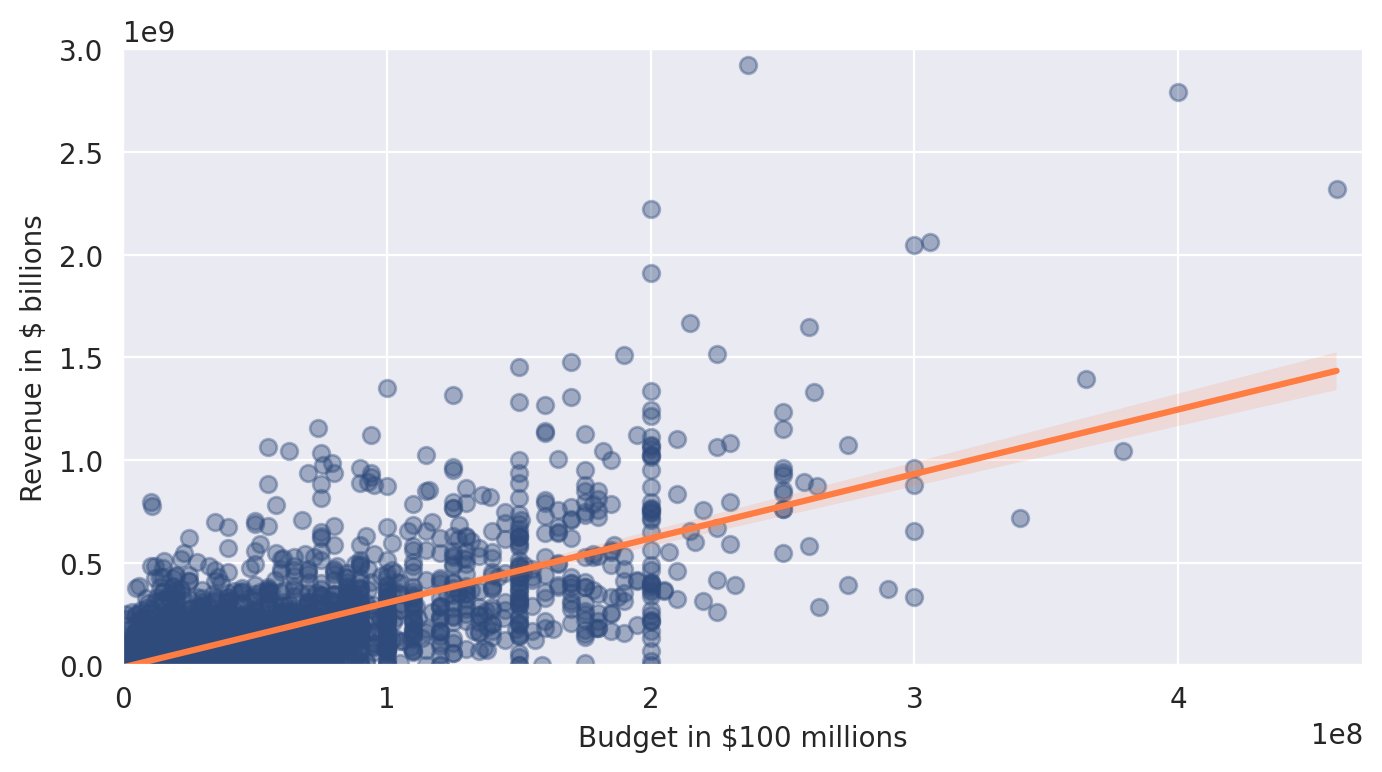

In [83]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4, 'color': '#2f4b7c'},
            line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 470000000),
        ylabel="Revenue in $ billions",
        xlabel='Budget in $100 millions'
        )

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [93]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

# Find the best-fit line
regression.fit(X, y)


LinearRegression()

In [96]:
# Theta zero
regression.intercept_

# Theta one
regression.coef_

# R-squared
regression.score(X, y)

0.5432025166693195

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [97]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)

LinearRegression()

In [100]:
# Theta zero
regression.intercept_

# Theta one
regression.coef_

# R-squared
regression.score(X, y)

0.03493501415879341

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [111]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 millions film is around ${revenue_estimate:.1f} .')

The estimated revenue for a $350 millions film is around $651000000.0 .
